In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [35]:
# Read the classification data set
data = pd.read_csv("C:/Users/P.SridharanSrinivas/Desktop/sai_pycaret/New_try/classification/data_cleaned.csv")

In [36]:
data

,Survived,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
0,0,22.000000,7.2500,0,0,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
1,1,38.000000,71.2833,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,1,26.000000,7.9250,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,1,35.000000,53.1000,1,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,35.000000,8.0500,0,0,1,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.000000,13.0000,0,1,0,0,1,1,0,...,1,0,0,0,0,0,0,0,0,1
887,1,19.000000,30.0000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
888,0,29.699118,23.4500,0,0,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
889,1,26.000000,30.0000,1,0,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,0


In [143]:
# dependent and indepedent variable split
X = data.loc[:,data.columns!='Survived']
y = data['Survived']



In [144]:
# Train test split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=42)

In [146]:
X_test.head(5)

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_C,Embarked_Q,Embarked_S
709,29.699118,15.2458,0,0,1,0,1,0,1,0,...,0,1,0,0,0,0,0,1,0,0
439,31.000000,10.5000,0,1,0,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
840,20.000000,7.9250,0,0,1,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,1
720,6.000000,33.0000,0,1,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
39,14.000000,11.2417,0,0,1,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0


In [40]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC
estimator = SVC(kernel='linear')
selector = RFECV(estimator, step=1,cv=5)
selector = selector.fit(X,y)
selector.support_
selector.ranking_

In [91]:
# svc = SVC( kernel = 'linear',  probability = True, random_state = 1 )  
# rfecv = RFECV(estimator = svc,scoring = 'roc_auc')
# rfecv.fit(X,y)
# selecInfo = rfecv.support_ 
# # selecIndex = np.where(selecInfo==1) 


      
       

          
                            
         

# TSNE
https://mark-borg.github.io/blog/2016/tsne-ml/

In [44]:
# TSNE, PCA
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [45]:
tsne_obj = tsne.fit_transform(data)

In [46]:
tsne_obj

array([[  2.4075255,  24.631245 ],
       [-30.965166 , -23.293903 ],
       [ 11.0672245,  21.78307  ],
       ...,
       [ -4.0972886,  -5.4620414],
       [-10.754449 ,  -6.5581326],
       [ 26.730133 ,   4.5827723]], dtype=float32)

In [48]:
tsne_df =pd.DataFrame({'X':tsne_obj[:,0],
                       'Y':tsne_obj[:,1],
                       'label':y})

In [49]:
tsne_df.head()

,X,Y,label
0,2.407526,24.631245,0
1,-30.965166,-23.293903,1
2,11.067225,21.783070,1
3,-23.387342,-17.414709,1
4,25.127279,0.549002,0


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

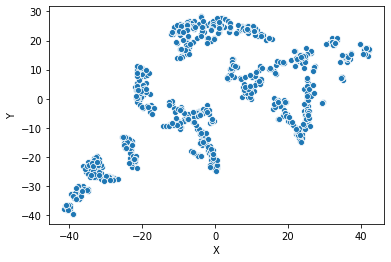

In [52]:
sns.scatterplot(x="X",y="Y",data=tsne_df)

In [56]:
data['Survived']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

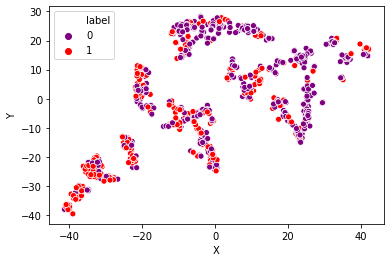

In [57]:
sns.scatterplot(x="X", y="Y",
              hue="label",
              palette=['purple','red'],
              legend='full',
              data=tsne_df);

# TSNE - PART 2
https://pyshark.com/visualization-of-multidimensional-datasets-using-t-sne-in-python/

In [110]:
from sklearn.preprocessing import StandardScaler
data_std = StandardScaler().fit_transform(data)


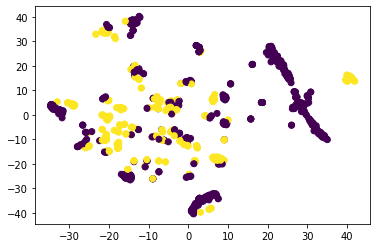

In [113]:
tsne = TSNE(random_state=0)
tsne_results = tsne.fit_transform(data_std)
tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])

plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=data.Survived)
plt.show()


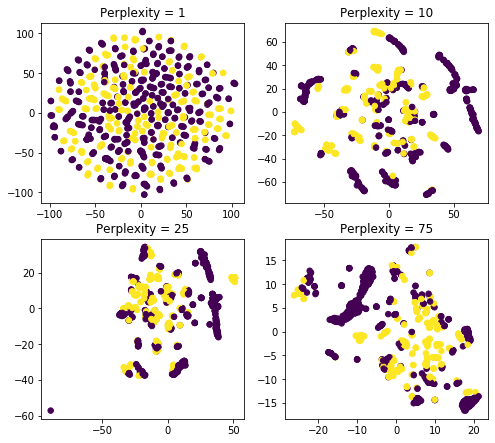

In [115]:
#parameter tuning
plt.figure(figsize = (8,4))
plt.subplots_adjust(top = 1.5)

for index, p in enumerate([1, 10, 25, 75]):

    tsne = TSNE(n_components = 2, perplexity = p, random_state=0)
    tsne_results = tsne.fit_transform(data_std)
    
    tsne_results=pd.DataFrame(tsne_results, columns=['tsne1', 'tsne2'])
    
    plt.subplot(2,2,index+1)
    plt.scatter(tsne_results['tsne1'], tsne_results['tsne2'], c=data.Survived, s=30)
    plt.title('Perplexity = '+ str(p))
plt.show()

In [ ]:
#https://cmdlinetips.com/2020/06/principal-component-analysis-with-penguins-data-in-python/

In [60]:
from sklearn.decomposition import PCA

In [78]:
# PCA
pca = PCA()
pca.fit(data)


PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
import matplotlib.pyplot as plt

In [79]:
pca.explained_variance_

array([2.47114168e+03, 1.67598355e+02, 5.89773145e-01, 3.70153640e-01,
       3.26086459e-01, 2.82253582e-01, 1.87206186e-01, 1.58821143e-01,
       1.16977443e-01, 9.64140897e-02, 9.26791215e-02, 4.84033735e-02,
       2.15680847e-02, 1.84275095e-02, 9.90764834e-03, 7.93900849e-03,
       5.96844623e-03, 5.54812049e-03, 4.69400678e-03, 1.27443693e-03,
       1.07955175e-32, 6.46995258e-33, 5.58329168e-33, 2.53351276e-33,
       8.31459482e-34])

In [62]:
pc_df = pd.DataFrame(data = data_pca , 
        columns = ['PC1', 'PC2','PC3', 'PC4'])

In [64]:
pca.explained_variance_ratio_

array([9.35654284e-01, 6.34581660e-02, 2.23307216e-04, 1.40152158e-04])

In [68]:
print(pca.explained_variance_)

[2.47114168e+03 1.67598355e+02 5.89773145e-01 3.70153640e-01]


In [67]:
# import seaborn as sns
# plt.figure(figsize=(12,10))
# with sns.plotting_context("notebook",font_scale=1.25):
#     sns.scatterplot(x="PC1", y="PC2",
#                     data=pc_df, 
#                     hue="label",
#                     s=100)

In [ ]:
# Dimension reduction 
#1. RFE
#2. PCA
#3. TSNE
#4. 

# PCA
https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [101]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [102]:
explained_variance = pca.explained_variance_ratio_

In [103]:
print(explained_variance)

[1.]


In [106]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [107]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [108]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[98  7]
 [52 22]]
0.6703910614525139


# Variable Importance
a) Permutation importance
b) Partial Plots
c) SHAP values

In [116]:
#https://www.kaggle.com/dansbecker/permutation-importance
#https://www.kaggle.com/dansbecker/partial-plots
#https://www.kaggle.com/dansbecker/shap-values
#https://eli5.readthedocs.io/en/latest/overview.html

In [147]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [148]:
my_model = RandomForestClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)

In [149]:
import eli5


In [150]:
from eli5.sklearn import PermutationImportance
from eli5.permutation_importance import get_score_importances

In [153]:
perm = PermutationImportance(my_model, random_state=0).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())


Weight,Feature
0.0816 ± 0.0219,Sex_male
0.0581 ± 0.0182,Fare
0.0335 ± 0.0353,Age
0.0246 ± 0.0152,Pclass_1
0.0112 ± 0.0484,Sex_female
0.0101 ± 0.0130,Embarked_S
0.0101 ± 0.0249,Pclass_3
0.0089 ± 0.0182,SibSp_0
0.0067 ± 0.0148,Embarked_C
0 ± 0.0000,SibSp_4


In [140]:
dataframe=pd.DataFrame(X_test, columns=['a']) 

In [141]:
dataframe

,a
0,-17.329378
1,-22.049936
2,-24.874517
3,-0.112751
4,-21.684879
...,...
174,-25.741756
175,-25.353110
176,-1.006217
177,-22.361643


In [142]:
eli5.show_weights(perm, feature_names = dataframe.columns.tolist())

Weight,Feature
0.0961 ± 0.0657,a


In [156]:
# Shap values
# import shap  # package used to calculate Shap values

# # Create object that can calculate shap values
# explainer = shap.TreeExplainer(my_model)

# # Calculate Shap values
# shap_values = explainer.shap_values(data_for_prediction)

# Model Selection
a) Pycaret
b) Lazypredict

In [157]:
#https://lazypredict.readthedocs.io/en/latest/readme.html
import lazypredict

In [160]:
from lazypredict.Supervised import LazyClassifier

In [161]:
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)
models

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 15.96it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.83,0.82,0.82,0.83,0.12
ExtraTreesClassifier,0.82,0.81,0.81,0.82,0.23
RandomForestClassifier,0.81,0.80,0.80,0.81,0.23
AdaBoostClassifier,0.80,0.80,0.80,0.80,0.09
LabelSpreading,0.81,0.80,0.80,0.81,0.06
LabelPropagation,0.80,0.79,0.79,0.80,0.05
LinearDiscriminantAnalysis,0.80,0.79,0.79,0.80,0.01
LinearSVC,0.80,0.78,0.78,0.80,0.09
RidgeClassifier,0.80,0.78,0.78,0.80,0.01


# Auto-ml gs
https://github.com/minimaxir/automl-gs

In [171]:
# from automl_gs import automl_grid_search


In [167]:
data.to_csv('C:/Users/P.SridharanSrinivas/Desktop/sai_pycaret/New_try/classification/data_cleaned.csv', index=False)

In [170]:
# automl_grid_search('C:/Users/P.SridharanSrinivas/Desktop/sai_pycaret/New_try/classification/data_cleaned.csv', 
#                    'Survived',
#                   framework='xgboost', num_epochs=50)


# TPOT
https://github.com/EpistasisLab/tpot

In [172]:
from tpot import TPOTClassifier
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, n_jobs=-1)
tpot.fit(X_train,y_train)


Generation 1 - Current best internal CV score: 0.8244164286417808
Best pipeline: RandomForestClassifier(SGDClassifier(LinearSVC(input_matrix, C=10.0, dual=True, loss=hinge, penalty=l2, tol=0.001), alpha=0.01, eta0=0.01, fit_intercept=False, l1_ratio=0.25, learning_rate=invscaling, loss=squared_hinge, penalty=elasticnet, power_t=50.0), bootstrap=False, criterion=entropy, max_features=0.25, min_samples_leaf=7, min_samples_split=20, n_estimators=100)


TPOTClassifier(config_dict=None, crossover_rate=0.1, cv=5,
               disable_update_check=False, early_stop=None, generations=5,
               log_file=<ipykernel.iostream.OutStream object at 0x000002732A13BFC8>,
               max_eval_time_mins=5, max_time_mins=None, memory=None,
               mutation_rate=0.9, n_jobs=-1, offspring_size=None,
               periodic_checkpoint_folder=None, population_size=50,
               random_state=None, scoring=None, subsample=1.0, template=None,
               use_dask=False, verbosity=2, warm_start=False)

In [ ]:
print(tpot.score(X_test,y_test))
pipeline_optimizer.export('tpot_exported_pipeline.py')

# ThunderGBM

In [177]:
# # import sys
# # sys.path.append("../")
# from thundergbm import TGBMClassifier
# from sklearn.datasets import load_digits
# from sklearn.metrics import accuracy_score

# clf = TGBMClassifier()
# clf.fit(X, y)
# y_pred = clf.predict(x)
# accuracy = accuracy_score(y, y_pred)
# print(accuracy)

# LIME
https://towardsdatascience.com/decrypting-your-machine-learning-model-using-lime-5adc035109b5

In [179]:
# import lime
# import lime.lime_tabular

# import pandas as pd
# import numpy as np
# import lightgbm as lgb

# # For converting textual categories to integer labels 
# from sklearn.preprocessing import LabelEncoder

# # for creating train test split
# from sklearn.model_selection import train_test_split

# # specify your configurations as a dict
# lgb_params = {
#     'task': 'train',
#     'boosting_type': 'goss',
#     'objective': 'binary',
#     'metric':'binary_logloss',
#     'metric': {'l2', 'auc'},
#     'num_leaves': 50,
#     'learning_rate': 0.1,
#     'feature_fraction': 0.8,
#     'bagging_fraction': 0.8,
#     'verbose': None,
#     'num_iteration':100,
#     'num_threads':7,
#     'max_depth':12,
#     'min_data_in_leaf':100,
#     'alpha':0.5}


# # reading the titanic data
# df_titanic = pd.read_csv('C:/Users/P.SridharanSrinivas/Desktop/sai_pycaret/New_try/classification/data_cleaned.csv')


# # data preparation
# df_titanic.fillna(0,inplace=True)

# le = LabelEncoder()

# feat = ['PassengerId', 'Pclass_le', 'Sex_le','SibSp_le', 'Parch','Fare']

# # label encoding textual data
# df_titanic['Pclass_le'] = le.fit_transform(df_titanic['Pclass'])
# df_titanic['SibSp_le'] = le.fit_transform(df_titanic['SibSp'])
# df_titanic['Sex_le'] = le.fit_transform(df_titanic['Sex'])


# # using train test split to create validation set
# X_train,X_test,y_train,y_test = train_test_split(df_titanic[feat],df_titanic[['Survived']],test_size=0.3)


# # def lgb_model(X_train,y_train,X_test,y_test,lgb_params):
# # create dataset for lightgbm
# lgb_train = lgb.Dataset(X_train, y_train)
# lgb_eval = lgb.Dataset(X_test, y_test)


# # training the lightgbm model
# model = lgb.train(lgb_params,lgb_train,num_boost_round=20,valid_sets=lgb_eval,early_stopping_rounds=5)



# # this is required as LIME requires class probabilities in case of classification example
# # LightGBM directly returns probability for class 1 by default 

# def prob(data):
#     return np.array(list(zip(1-model.predict(data),model.predict(data))))
    


# explainer = lime.lime_tabular.LimeTabularExplainer(df_titanic[model.feature_name()].astype(int).values,  
# mode='classification',training_labels=df_titanic['Survived'],feature_names=model.feature_name())


# # asking for explanation for LIME model
# i = 1
# exp = explainer.explain_instance(df_titanic.loc[i,feat].astype(int).values, prob, num_features=5)



In [182]:
import PyPDF2
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [183]:
filename = 'C:/Users/P.SridharanSrinivas/Desktop/sai_pycaret/New_try/manibook'
open_filename = open(filename, 'rb')

ind_manifesto = PyPDF2.PdfFileReader(open_filename)

In [184]:
total_pages = ind_manifesto.numPages
total_pages

28

In [185]:
count = 0
text  = ''

# Lets loop through, to read each page from the pdf file
while(count < total_pages):
    # Get the specified number of pages in the document
    mani_page  = ind_manifesto.getPage(count)
    # Process the next page
    count += 1
    # Extract the text from the page
    text += mani_page.extractText()
    

In [186]:
if text != '':
    text = text
    
else:
    textract.process(open_filename, method='tesseract', encoding='utf-8', langauge='eng' ) 

In [187]:
from autocorrect import Speller
from nltk.tokenize import word_tokenize


def to_lower(text):

    """
    Converting text to lower case as in, converting "Hello" to  "hello" or "HELLO" to "hello".
    """
    
    # Specll check the words
    spell  = Speller(lang='en')
    
    texts = spell(text)
    
    return ' '.join([w.lower() for w in word_tokenize(text)])

lower_case = to_lower(text)
print(lower_case)

table of content a . introduction 1-2 b . improving sanitation ! 3-7 c. strategies for government 7-9 d. the economy ! 9-11 e. infrastructure ! 11-15 f. industry ! 17-23 g. social services ! 23-25 h. summ ary 25-26 a . introduction 1 . nearly 30 years after our heroes and heroines sacrificed , many tortured , or imprisoned in the fight to gain our independence , self -determination and socioeconomic development , it is time to ask if the promises of freedom are being delivered . we need to look closely and constructively at what is good in namibia , what is not so good and what needs to be done to meet our expectations . we can not blame the outside world or other countries for our troubles . we are a sma ll country with large resources , resources the world needs . some african countries with fewer resources and bigger populations are outperforming us economically . something must be wrong with our strategies and decisions . this manifesto sets out what we need to do to install good g

In [188]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from autocorrect import spell

In [189]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    # Initialize the stopwords variable, which is a list of words ('and', 'the', 'i', 'yourself', 'is') that do not hold much values as key words
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
    
    # Removing prefixed 'b'
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    
    
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [193]:
import nltk

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\P.SridharanSrinivas\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\P.SridharanSrinivas\AppData\Roaming\nltk_data
[nltk_data]     ...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [194]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

# lets print out the output from our function above and see how the data looks like
clean_data = ' '.join(lemmatized_word)
print(clean_data)

table content introduction b improving sanitation strategy government economy infrastructure industry social service summ ary introduction nearly year hero heroine sacrificed many tortured imprisoned fight gain independence self socioeconomic development time ask promise freedom delivered need look closely constructively good namibia good need done meet expectation blame outside world country trouble sma country large resource resource world need african country fewer resource bigger population outperforming u economically something must wrong strategy decision manifesto set need install good governance identifies priority return benefit countryõs rich people struggle intended simply replace rich white people rich black people provide opportunity people participate building enjoying countryõs rich government living peopleõs expectation must due either people running government system government course namibia plagu ed common weakness emerging nation ð self elite whose initial intention

In [195]:
import pandas as pd

In [196]:
df = pd.DataFrame([clean_data])
df.columns = ['script']
df.index = ['Itula']
df

,script
Itula,table content introduction b improving sanitat...


In [197]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [198]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df.index
data_vect_feat

,abandoning,ability,able,abridge,abroad,abuse,academia,academic,accelerate,accelerating,...,youth,youthfulness,zambezi,òjobs,òlift,ònatural,òthe,òunspoiltó,ôall,õs
Itula,1,1,2,1,1,1,1,2,2,1,...,23,1,1,1,1,1,1,1,1,1


In [200]:
data = data_vect_feat.transpose()
data

,Itula
abandoning,1
ability,1
able,2
abridge,1
abroad,1
...,...
ònatural,1
òthe,1
òunspoiltó,1
ôall,1


In [201]:
import matplotlib.pyplot as plt
import seaborn as sn

# Find the top 1000 words written in the manifesto
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

    
for x in list(top_dict)[0:100]:
    print("key {}, value {} ".format(x,  top_dict[x]))

key Itula, value [('need', 39), ('people', 35), ('namibian', 26), ('namibia', 26), ('government', 25), ('youth', 23), ('health', 21), ('economy', 21), ('free', 18), ('citizen', 18), ('provide', 17), ('education', 16), ('service', 16), ('country', 16), ('benefit', 16), ('resource', 15), ('president', 14), ('shall', 14), ('business', 13), ('political', 13), ('water', 12), ('new', 12), ('nation', 12), ('sector', 11), ('state', 11), ('road', 11), ('access', 11), ('training', 11), ('opportunity', 11), ('land', 11), ('leader', 10), ('way', 10), ('market', 10), ('company', 10), ('party', 10), ('private', 10), ('good', 10), ('make', 9), ('activity', 9), ('mining', 9), ('industry', 9), ('future', 9), ('independent', 9), ('change', 9), ('right', 9), ('community', 9), ('policy', 9), ('especially', 8), ('time', 8), ('large', 8), ('skill', 8), ('development', 8), ('care', 8), ('worker', 8), ('tourism', 7), ('international', 7), ('institution', 7), ('public', 7), ('trade', 7), ('infrastructure', 7),

In [202]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 100 words for each comedian
words = []
for president in data:
    top = [word for (word, count) in top_dict[president]]
    for t in top:
        words.append(t)

print(words[:10])

['need', 'people', 'namibian', 'namibia', 'government', 'youth', 'health', 'economy', 'free', 'citizen']


In [203]:
from wordcloud import WordCloud, STOPWORDS
import imageio
import matplotlib.pyplot as plt
import nltk

# Image used in which our world cloud output will be
img1 = imageio.imread("../input/manifesto/itula.jpeg")
hcmask1 = img1

# Get 100 words based on the 
words_except_stop_dist = nltk.FreqDist(w for w in words[:100]) 
wordcloud = WordCloud(stopwords=set(STOPWORDS),background_color='black',mask=hcmask1).generate(" ".join(words_except_stop_dist))
plt.imshow(wordcloud,interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 100 words from Dr. Itula's Manifesto 2019",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('Manifesto_top_100.jpeg')

FileNotFoundError: No such file: 'C:\Users\P.SridharanSrinivas\Desktop\sai_pycaret\input\manifesto\itula.jpeg'

In [204]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob


In [205]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.07240899626355898, subjectivity=0.456152041874476)

In [207]:
from gensim.summarization.summarizer import summarize

In [209]:

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
import pyLDAvis
#import graphlab as gl
#import pyLDAvis.graphlab
import pyLDAvis.gensim  # don't skip this

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

In [210]:
data  = []
data.append(clean_text(lower_case))

In [216]:
import en_core_web_sm
nlp = en_core_web_sm.load()

In [220]:
# This time we use spacy for lemmatizarion 
import spacy

# Second lemmatization of our data
def lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_output = []
    for sent in data:
        doc = nlp(" ".join(sent)) 
        texts_output.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_output



In [222]:
nlp = en_core_web_sm.load()

# Lemmatize keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

In [223]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]


# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 2), (9, 2), (10, 12), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 1), (18, 1), (19, 7), (20, 1), (21, 1), (22, 9), (23, 1), (24, 2), (25, 2), (26, 1), (27, 1), (28, 4), (29, 1), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 2), (36, 1), (37, 1), (38, 6), (39, 3), (40, 1), (41, 1), (42, 1), (43, 2), (44, 4), (45, 1), (46, 1), (47, 2), (48, 4), (49, 3), (50, 6), (51, 2), (52, 1), (53, 10), (54, 5), (55, 2), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 3), (63, 2), (64, 2), (65, 1), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 1), (73, 4), (74, 1), (75, 1), (76, 1), (77, 1), (78, 4), (79, 1), (80, 1), (81, 2), (82, 1), (83, 1), (84, 1), (85, 4), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 2), (96, 1), (97, 2), (98, 1), (99, 1), (100, 2), (101, 2), (102, 6), (103, 3), (104, 1), (105, 1), (106, 2), (107, 5), (108, 2), (109, 1), (110, 

In [224]:
# LDA model

lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus, id2word=id2word, alpha='auto', num_topics=20, random_state=100,
                                           update_every=1, passes=20, per_word_topics=True)

In [225]:
# Lets view the topics in our model
print(lda_model.print_topics())
doc_lda  = lda_model[corpus]

[(0, '0.001*"people" + 0.001*"need" + 0.001*"economy" + 0.001*"namibian" + 0.001*"government" + 0.001*"make" + 0.001*"country" + 0.001*"youth" + 0.001*"education" + 0.001*"citizen"'), (1, '0.001*"need" + 0.001*"people" + 0.001*"economy" + 0.001*"namibian" + 0.001*"youth" + 0.001*"government" + 0.001*"country" + 0.001*"free" + 0.001*"education" + 0.001*"citizen"'), (2, '0.001*"people" + 0.001*"need" + 0.001*"namibian" + 0.001*"benefit" + 0.001*"youth" + 0.001*"government" + 0.001*"economy" + 0.001*"country" + 0.001*"provide" + 0.001*"citizen"'), (3, '0.001*"people" + 0.001*"need" + 0.001*"government" + 0.001*"provide" + 0.001*"service" + 0.001*"namibian" + 0.001*"citizen" + 0.001*"make" + 0.001*"youth" + 0.001*"country"'), (4, '0.013*"need" + 0.012*"people" + 0.008*"government" + 0.007*"economy" + 0.007*"namibian" + 0.007*"youth" + 0.006*"citizen" + 0.006*"provide" + 0.005*"free" + 0.005*"health"'), (5, '0.001*"need" + 0.001*"people" + 0.001*"government" + 0.001*"economy" + 0.001*"namib

In [226]:
print('\nPerplexity:', lda_model.log_perplexity(corpus))


# Coherence Score

coherence_model_lda = CoherenceModel(lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score:', coherence_lda)


Perplexity: -7.881730234045289
Coherence Score: 0.26638538414874474


In [228]:
pyLDAvis.enable_notebook()
vis_topics = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)

# Autogluon

In [230]:
import autogluon as ag
from autogluon import TabularPrediction as task

ModuleNotFoundError: No module named 'autogluon'